In [13]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import math
import matplotlib.pyplot as plt 

# 1. Exploratory Data Analysis¶

## 1.1 Data loading and cleaning

In [3]:
df = pd.read_csv('data.csv')

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
# Drop columns 'Unnamed: 32'

df.drop("Unnamed: 32", axis=1, inplace=True)

## 1.2 Data Visualization

<Axes: >

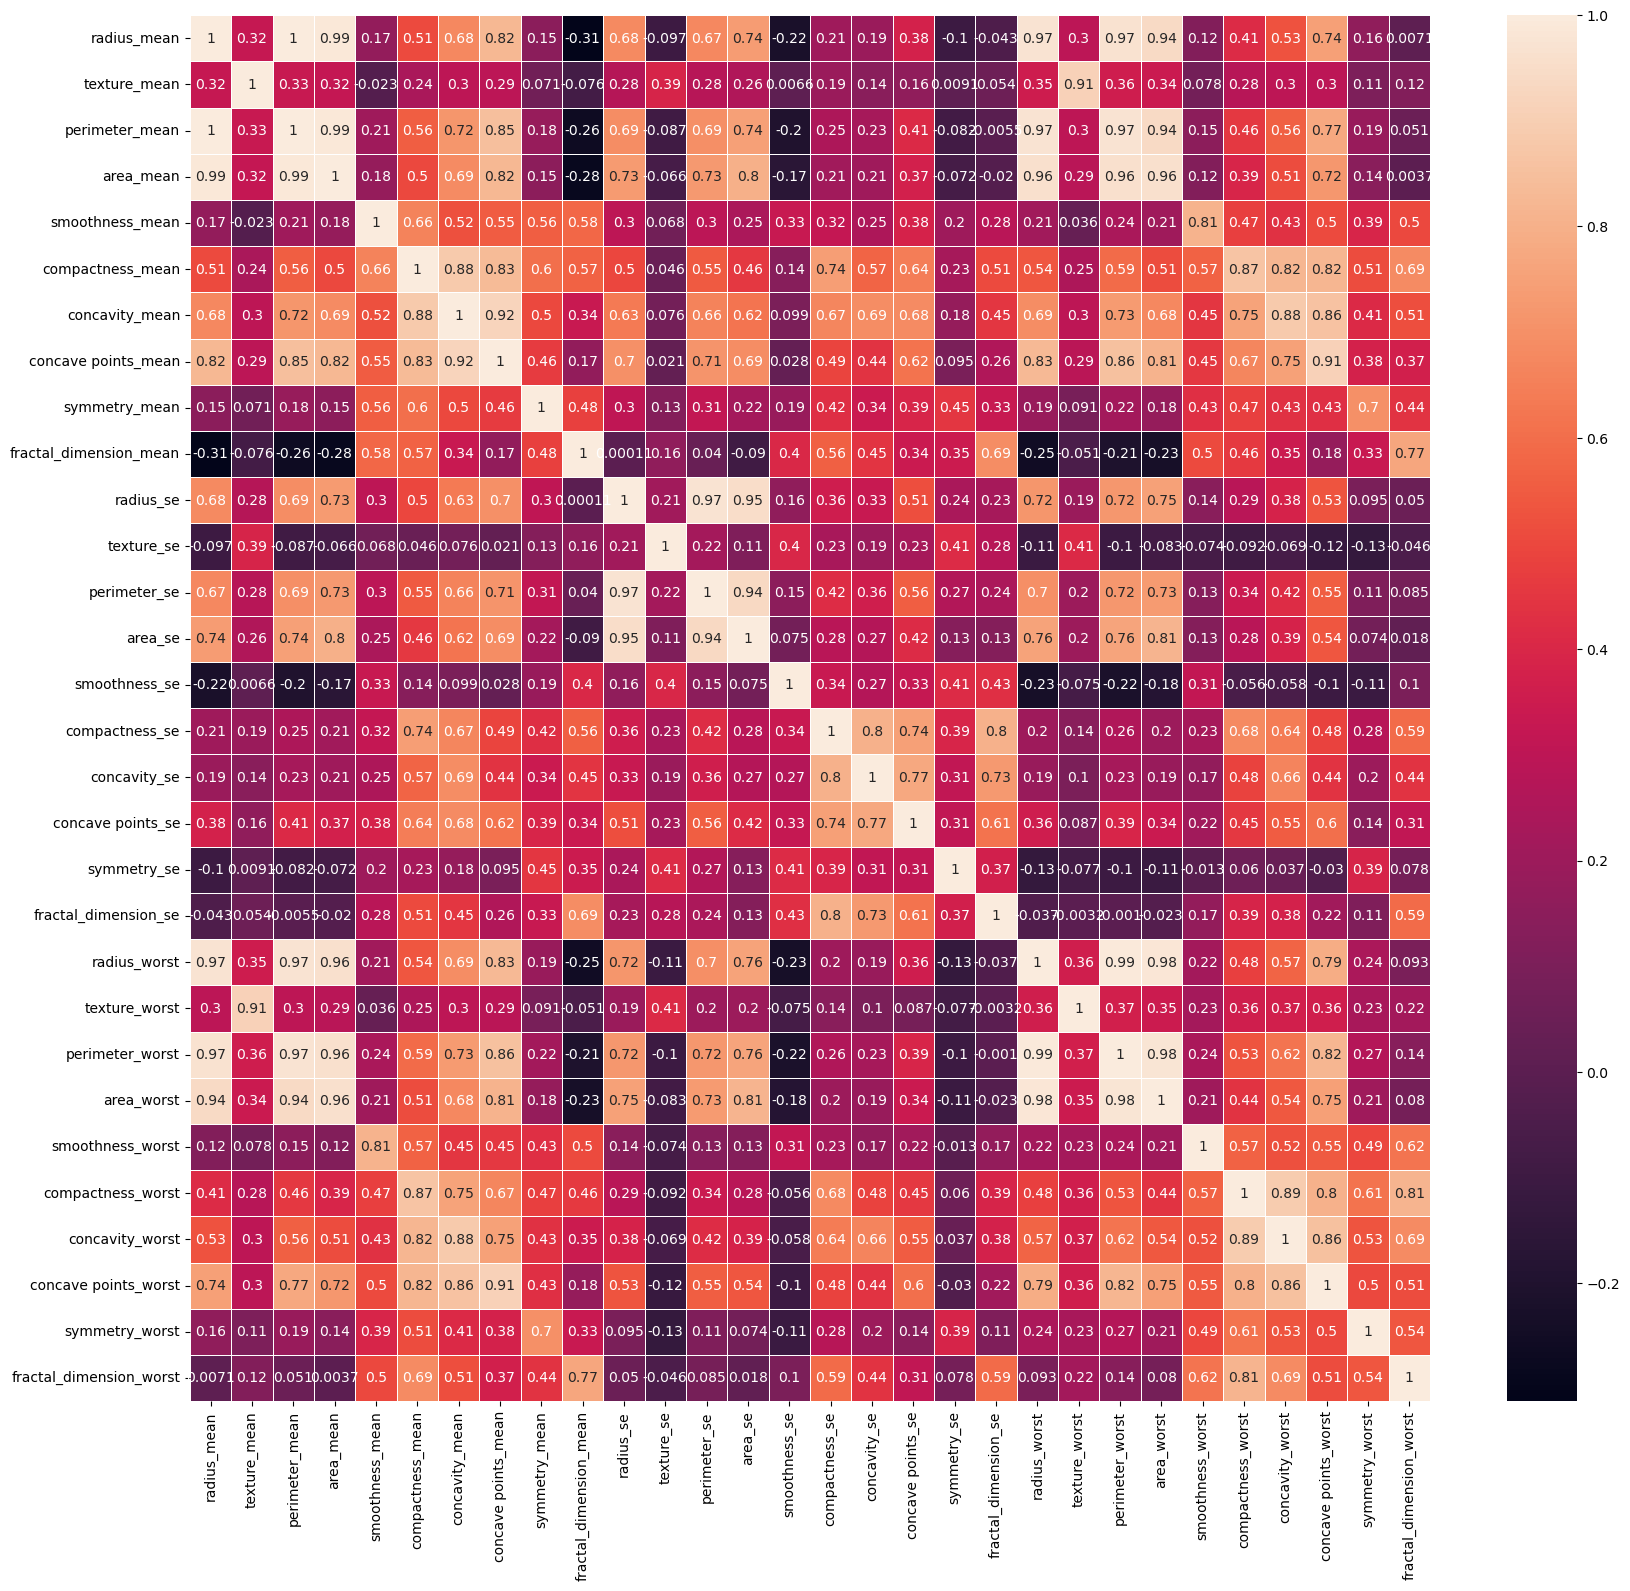

In [10]:
# heatmap to see correlation between features
corr = df.drop(columns= ['id','diagnosis'], axis=1).corr()
plt.figure(figsize=(20,18))
sns.heatmap(corr, annot=True,linewidths=.5)

In [11]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

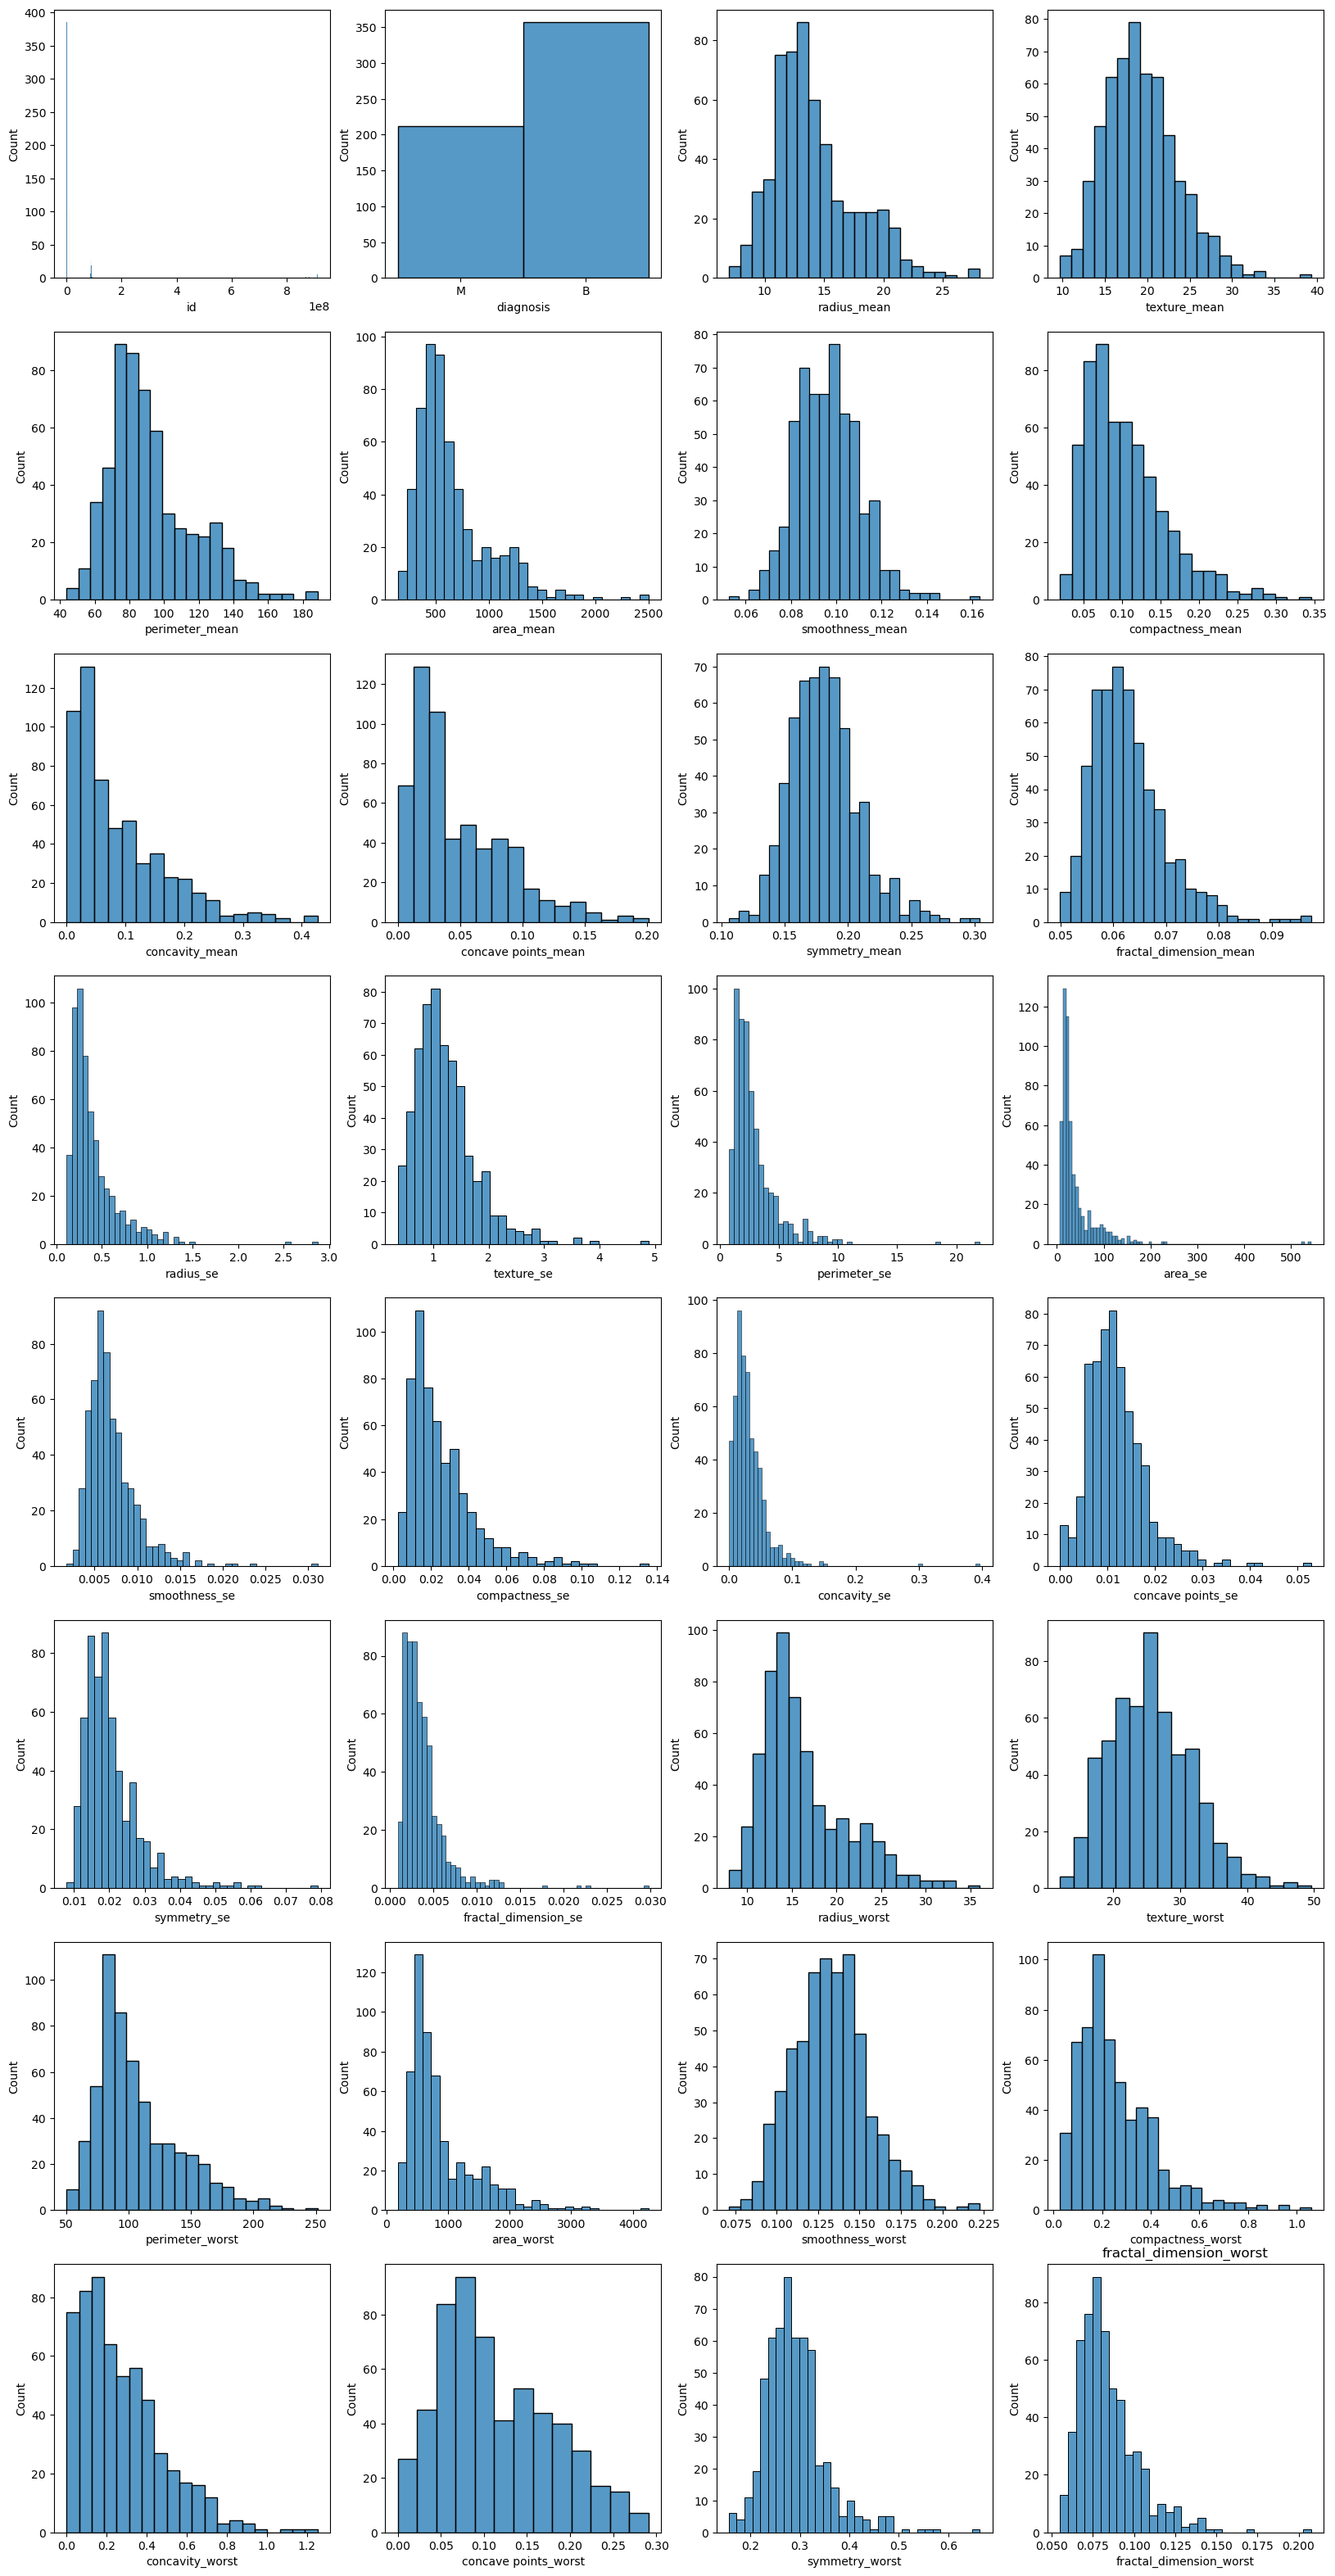

In [14]:
rows = math.ceil(len(df.columns)/4)
fig, axs= plt.subplots(rows, 4, figsize=(20, 5*rows))
for i, ax in zip(df.columns, axs.flat):
    sns.histplot(data = df, x=i, ax=ax)
    plt.title(i)
plt.show()

In [12]:
# The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image
# Getting Mean Columns with diagnosis
m_col = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# Getting Se Columns with diagnosis
s_col = ['diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']

# Getting Worst column with diagnosis
w_col = ['diagnosis','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

# 3. Data Preprocessing and Dimensionality Reduction (PCA)


## 3.1 Creat a PCA pipeline

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.impute import SimpleImputer  
from sklearn.preprocessing import StandardScaler, OneHotEncoder  
from sklearn.compose import make_column_transformer  
from sklearn.pipeline import make_pipeline  

In [74]:
X = df.drop(columns=['id','diagnosis'], axis=1)

scaler = StandardScaler()
decomp = PCA(n_components = 0.9)
pipe = make_pipeline(scaler, decomp)

pipe.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9))])

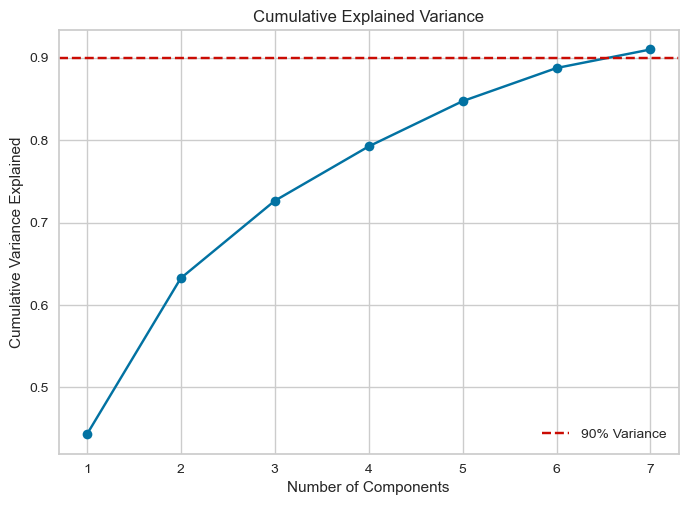

In [75]:
pca = pipe.named_steps['pca']

cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Plot the cumulative explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.legend()
plt.show()

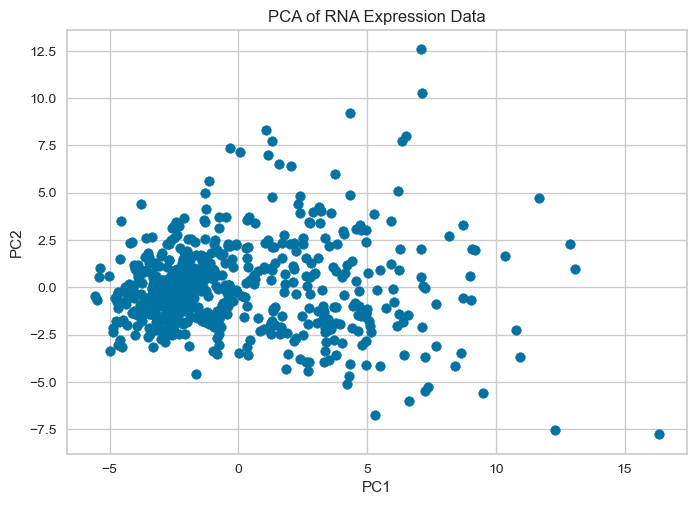

In [76]:
pca_result = pipe.transform(X)

# Now, plot the first two principal components
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA of RNA Expression Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [77]:
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Cumulative explained variance: {pca.explained_variance_ratio_.cumsum()}")

Explained variance ratio: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734]
Cumulative explained variance: [0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953 ]


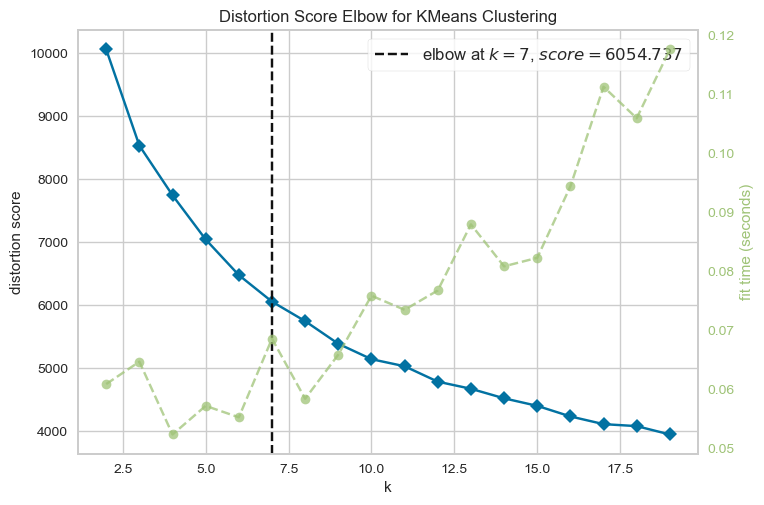

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [78]:
scaler = StandardScaler()
decomp = PCA(n_components=0.9)
cluster = KElbowVisualizer(KMeans(n_init=20),k=(2, 20))  
pipe = make_pipeline(scaler, decomp, cluster)

pipe.fit(X)
pipe[2].show()

## 3.2 The full pipeline with KMeans 

In [79]:
scaler = StandardScaler()
decomp = PCA(n_components=.9)
cluster = KMeans(n_init=10, n_clusters=3)
pipe= make_pipeline(scaler, decomp, cluster)

pipe.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('kmeans', KMeans(n_clusters=3, n_init=10))])

In [80]:
values = pipe[:2].transform(X)
pca_labels = [f'PC{idx+1}' for idx, i in enumerate(values.T)]
df = df.join(pd.DataFrame(values, columns=pca_labels))

df['clusters'] = pipe['kmeans'].labels_

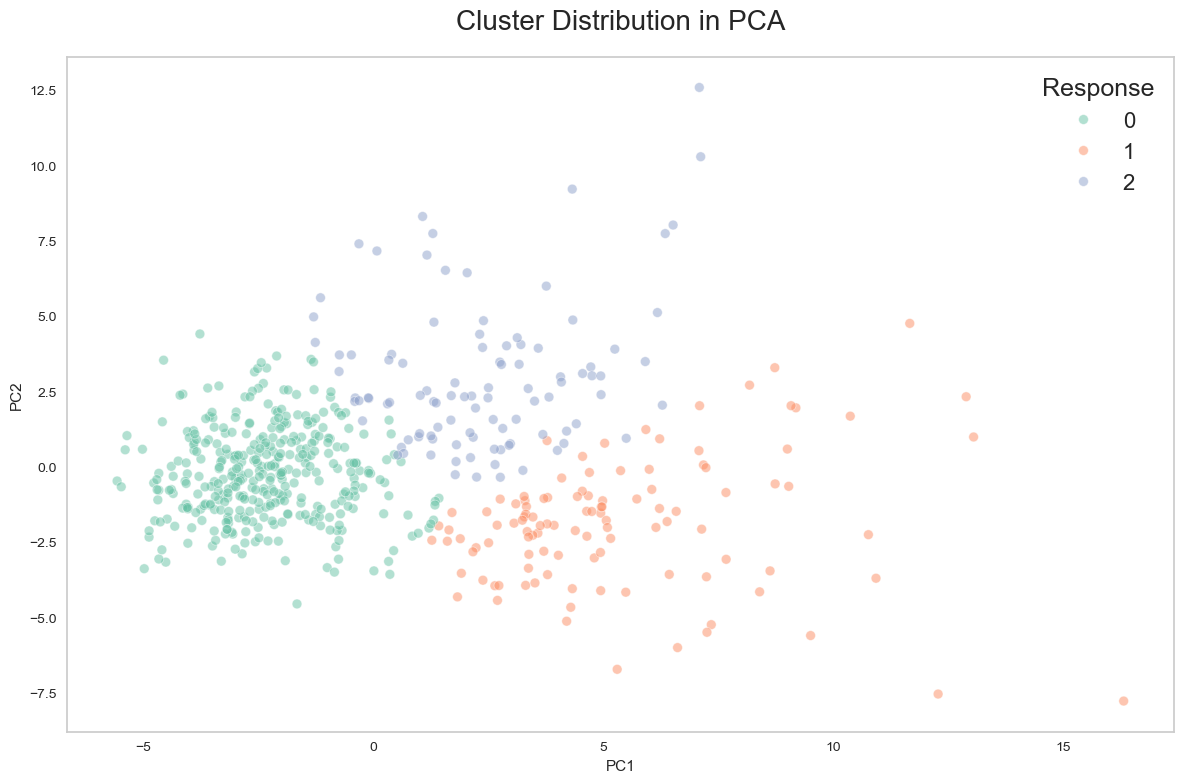

In [81]:
# Plot to see the distribution of clusters
plt.figure(figsize=(12,8))
g = sns.scatterplot(data=df, x="PC1", y="PC2", hue="clusters", alpha=0.5, palette="Set2")
plt.title('Cluster Distribution in PCA', fontsize=20, pad=20) 
plt.legend(title='Response', fontsize=16, title_fontsize='18')

plt.subplots_adjust(top=0.85)  # Adjust the top margin (default is 0.9)
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig('Cluster_Distribution_PCA.png', bbox_inches="tight")

<Axes: xlabel='clusters', ylabel='count'>

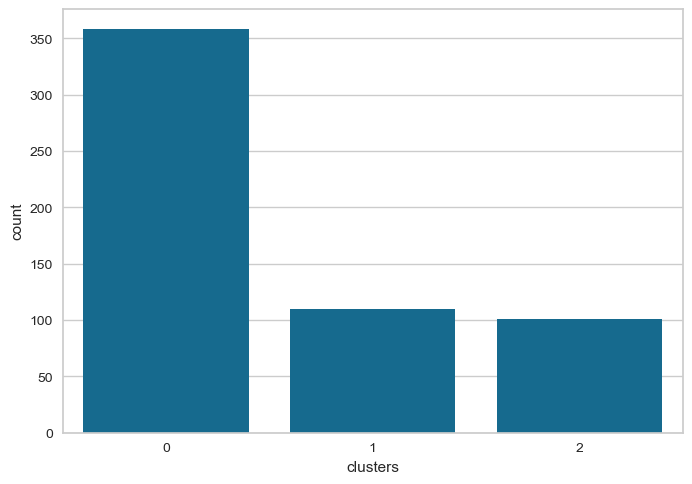

In [83]:
sns.countplot(x = "clusters", data=df)

## 3.3 Analyze the clusters

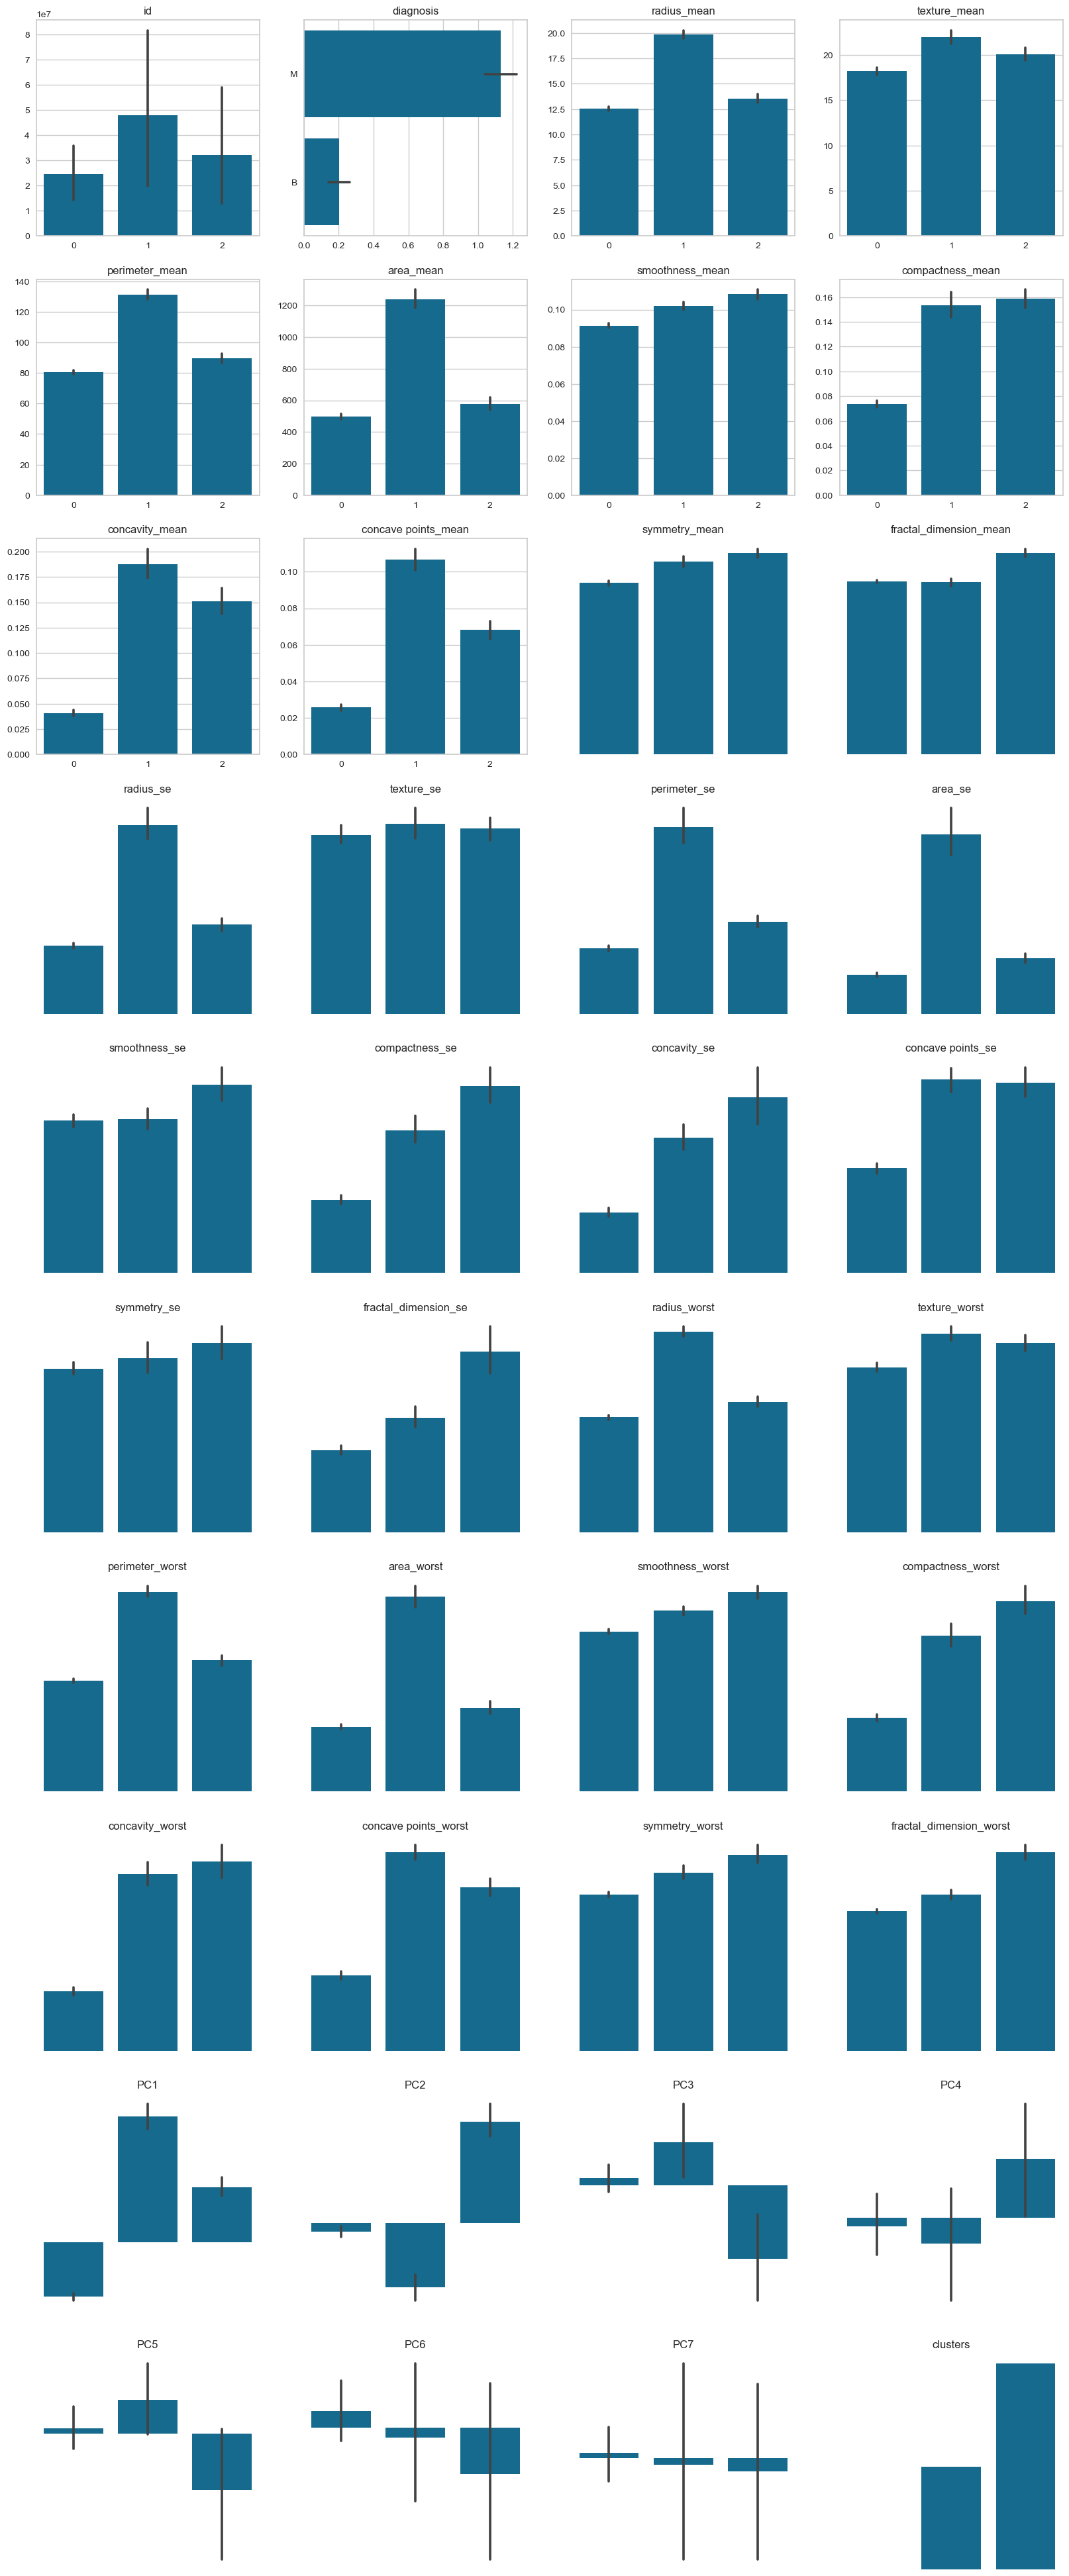

In [85]:
rows = math.ceil(len(df.columns)/4)
fig, axs= plt.subplots(rows, 4, figsize=(20, 5*rows))
for i, ax in zip(df.columns, axs.flat):
    g=sns.barplot(data=df, x="clusters",y=i, ax=ax)
    ax.set(xlabel='', ylabel='', title=i)

for i in axs.flat[::-1][:rows*3-len(df.columns)]:
    i.set_axis_off()
plt.show()
plt.show()

In [ ]:
# Rename the clusters based on the distribuiton in features
df['clusters'] = df['clusters'].map({0:'Benign', 1:'Malignant', 2:'Potential_Malignant' })

/var/folders/ys/kt70q71j7gz446l2lbpzjg9c0000gn/T/ipykernel_48928/3785387966.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="clusters", data=df, palette="Set2")


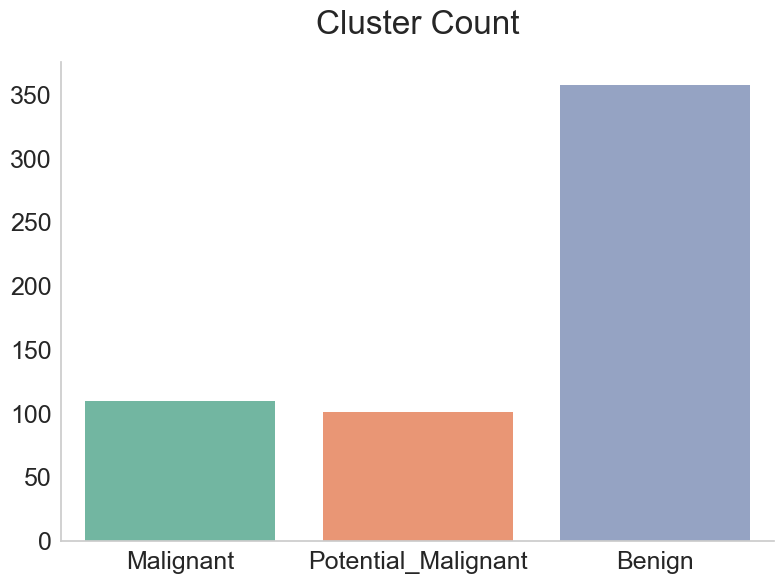

In [87]:
# Count plot with correct hue assignment
plt.figure(figsize=(8, 6))
sns.countplot(x="clusters", data=df, palette="Set2")

# Titles and styling for countplot
plt.title("Cluster Count", fontsize=24, pad=20)
plt.xlabel('')  # Remove x-axis label
plt.ylabel('')  # Remove y-axis label
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Remove grid and top/right spines
plt.grid(False)
sns.despine(top=True, right=True)

# Adjust layout for better spacing
plt.tight_layout()

# Save the count plot
# plt.savefig('Cluster_Distribution_PCA.png', bbox_inches="tight", dpi=300)

# Display the count plot
plt.show()

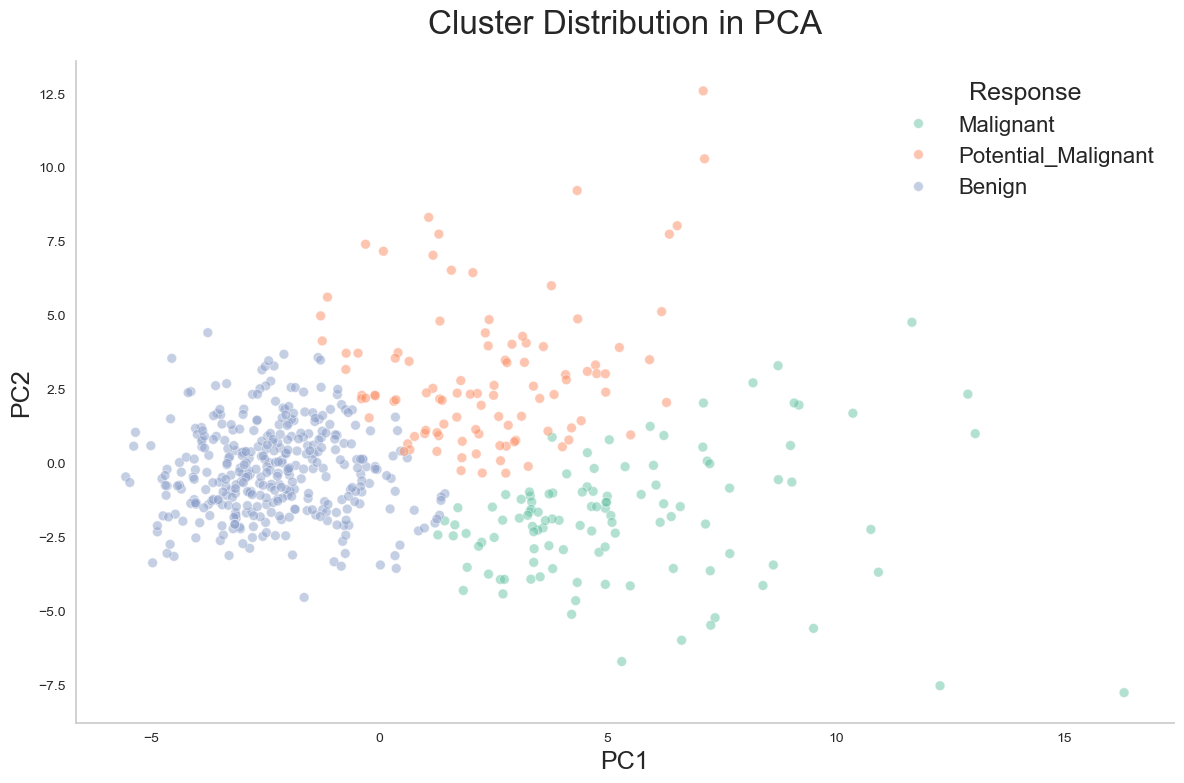

In [89]:
plt.figure(figsize=(12,8))
g = sns.scatterplot(data=df, x="PC1", y="PC2", hue="clusters", alpha=0.5, palette="Set2")
plt.title('Cluster Distribution in PCA', fontsize=24, pad=20) 
plt.legend(title='Response', fontsize=16, title_fontsize='18')
plt.xlabel("PC1",fontsize=18)
plt.ylabel("PC2",fontsize=18)
plt.subplots_adjust(top=0.85)  # Adjust the top margin (default is 0.9)
plt.grid(False)
sns.despine(top=True, right=True)
plt.tight_layout()

# Save the figure
plt.savefig('Cluster_Distribution_PCA_2.png', bbox_inches="tight")

In [90]:
shape_size_feature = ['radius_mean', 'perimeter_mean','area_mean']
texture_feature = ['texture_mean', 'smoothness_mean',  'fractal_dimension_mean']
morphological_feature = [ 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean']

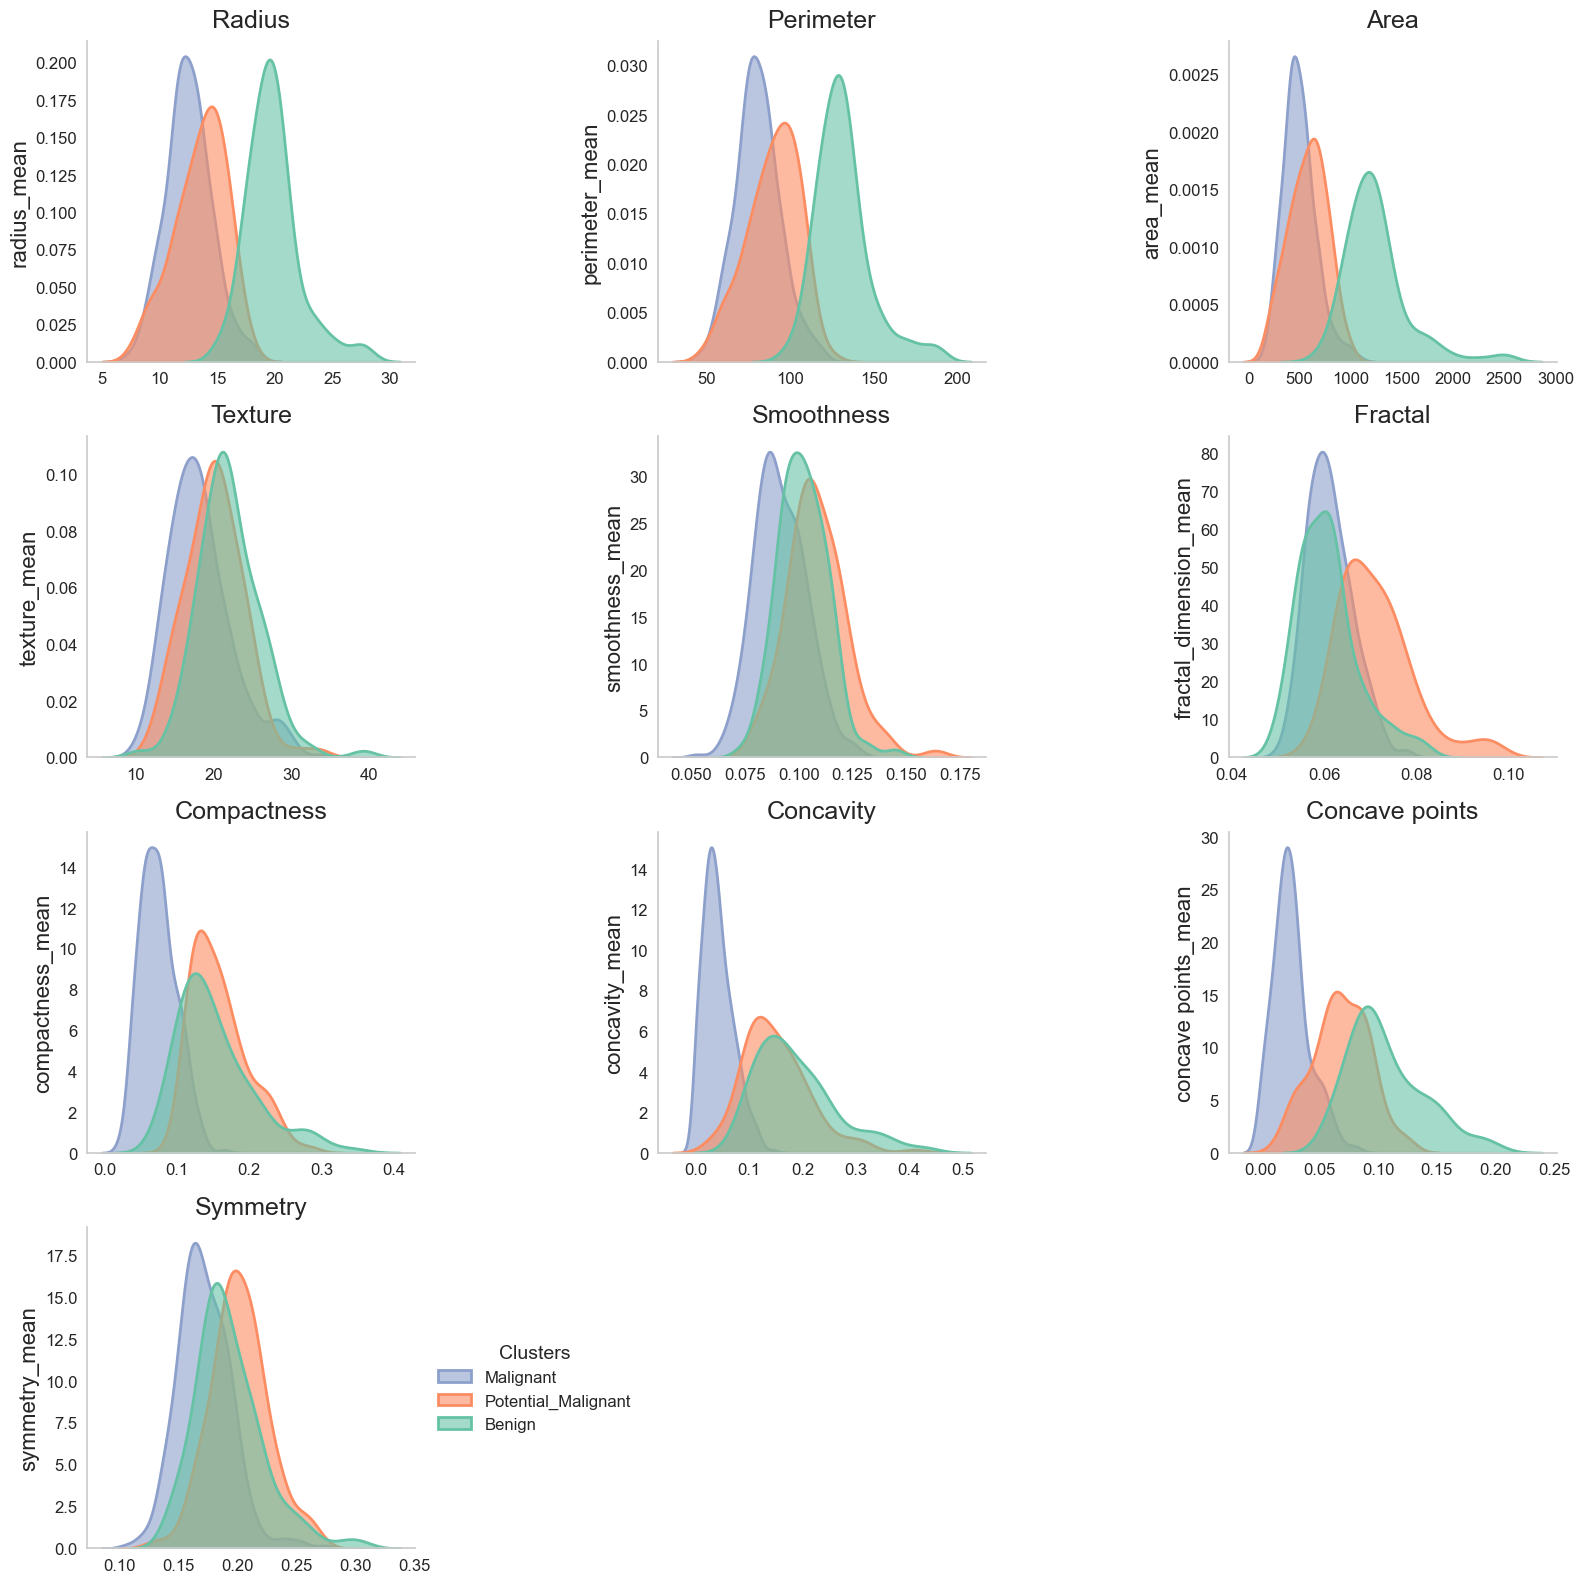

In [124]:
features = ['radius_mean', 'perimeter_mean', 'area_mean', 'texture_mean', 
            'smoothness_mean', 'fractal_dimension_mean', 'compactness_mean', 
            'concavity_mean', 'concave points_mean', 'symmetry_mean']

plt.figure(figsize=(16, 16))

for i, feature in enumerate(features, 1):
    ax = plt.subplot(4, 3, i)
    sns.kdeplot(
        data=df, 
        x=feature, 
        hue='clusters', 
        palette='Set2', 
        fill=True,  # To fill the area under the curve
        common_norm=False,  # Ensure that the area under the curves does not sum to 1
        linewidth=2,  # Line thickness
        alpha=0.6,  # Transparency for fill
        ax=ax
    )
    title = feature.split('_')[0].capitalize()
    plt.title(f'{title}', fontsize=18, pad=10)
    plt.xlabel('', fontsize=16)
    plt.ylabel(feature, fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    sns.despine(top=True, right=True)
    plt.grid(False)

    # Remove legend from all subplots except the last one
    if i != len(features):
        ax.get_legend().remove()

# Add legend manually for the last subplot
plt.subplot(4, 3, len(features))
plt.legend(
    title='Clusters',
    labels=df['clusters'].unique(),  # Ensure labels are manually passed
    fontsize=12,
    title_fontsize=14,
    loc='center left',
    bbox_to_anchor=(1.05, 0.5),  # Position the legend outside to the right
    borderaxespad=0,
)

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('Cluster_Distribution_in_Features.png', bbox_inches="tight")
plt.show()